In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import sys
import os

# Add the src directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from eda import load_datasets


In [3]:
# # Import the load_datasets function from src/eda.py
# from src.eda import load_datasets

# Load datasets
benin_df, sierra_df, togo_df = load_datasets()

In [4]:
from eda import summary_statistics
print("\n")
print(f"Statistics summary for dataset in Benign:\n {summary_statistics(benin_df)}")
print("\n")
print("\n")
print(f"Statistics summary for dataset in Sier Liyon:\n {summary_statistics(sierra_df)}")
print("\n")
print("\n")
print(f"Statistics summary for dataset in Togo:\n {summary_statistics(togo_df)}")



Statistics summary for dataset in Benign:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       

In [5]:
from eda import check_data_quality

quality_report = check_data_quality(benin_df)
print(f"Data quality for Benin: {quality_report['summary']}")

Data quality for Benin: {'total_missing': 0, 'total_negative': 794016, 'total_outliers': 12423}


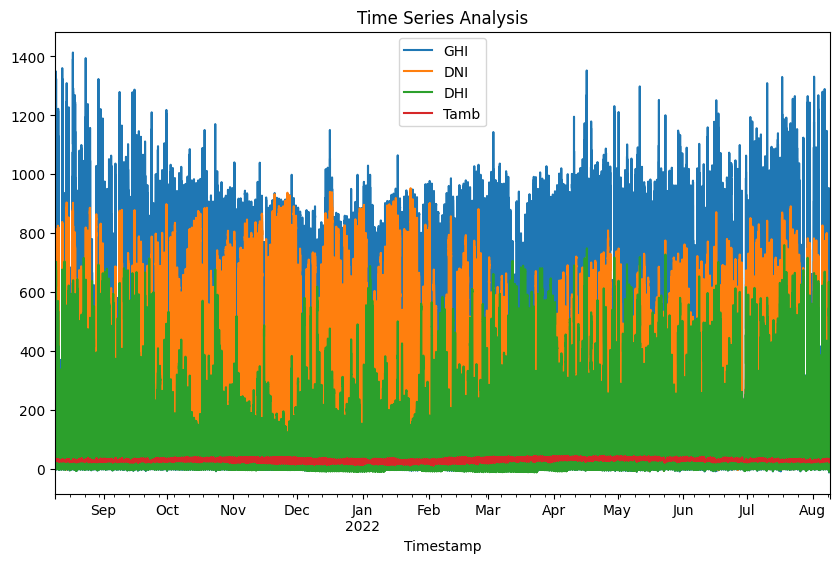

In [6]:
from eda import plot_time_series
plot_time_series(benin_df, "Timestamp", ['GHI', 'DNI', 'DHI', 'Tamb'], title="Time Series Analysis")

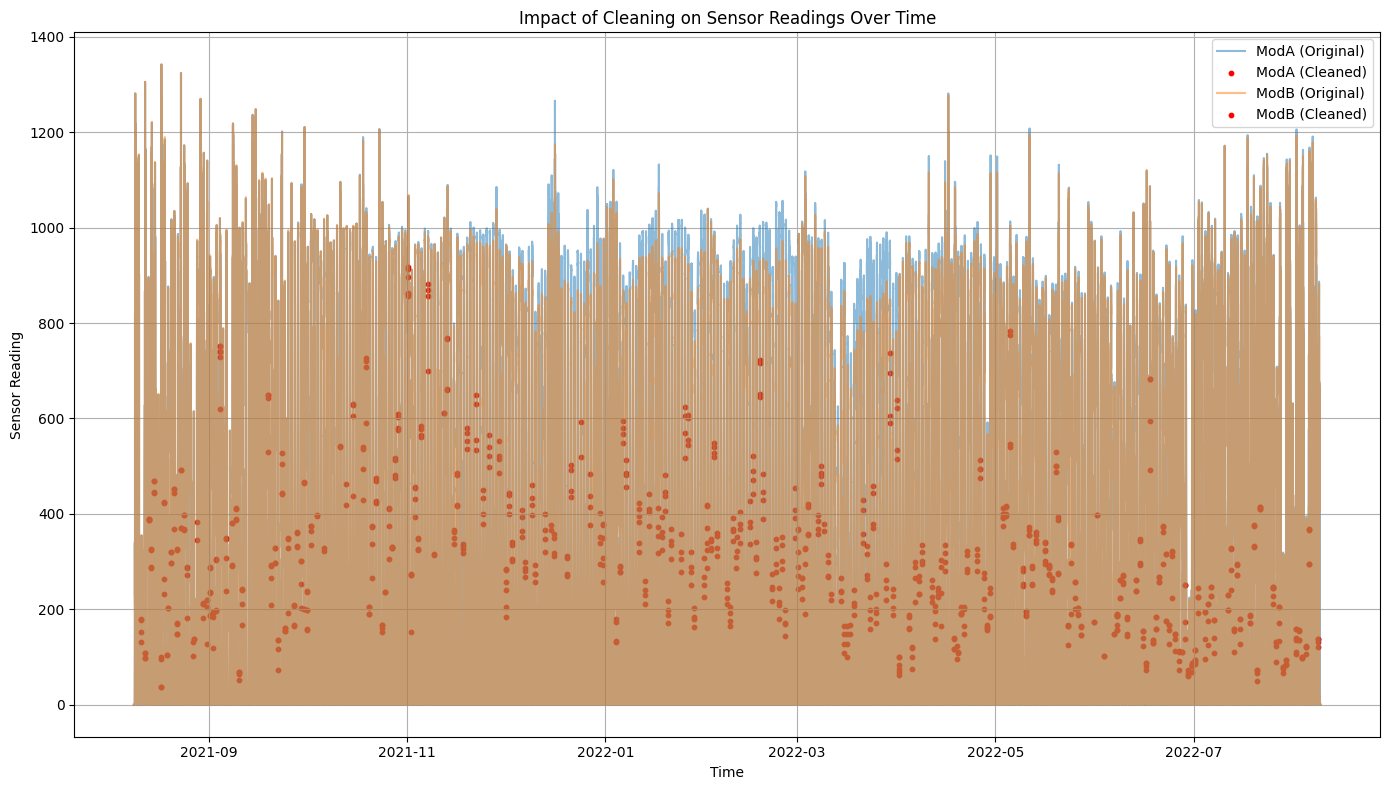

Uncleaned Data Summary:
                ModA           ModB
count  525115.000000  525115.000000
mean      236.524253     228.816071
std       327.002662     316.640506
min         0.000000       0.000000
25%         0.000000       0.000000
50%         4.300000       4.200000
75%       463.900000     448.100000
max      1342.300000    1342.300000

Cleaned Data Summary:
             ModA        ModB
count  485.000000  485.000000
mean   307.229278  301.972165
std    159.987048  153.643905
min     37.100000   37.300000
25%    187.800000  186.100000
50%    291.700000  283.200000
75%    393.900000  375.200000
max    914.000000  917.000000


In [7]:
from eda import evaluate_cleaning_impact

# Evaluate cleaning impact on the Benin dataset
cleaning_impact_summary = evaluate_cleaning_impact(benin_df, sensor_columns=['ModA', 'ModB'], cleaning_column='Cleaning', time_column='Timestamp')

# Display summary statistics
print("Uncleaned Data Summary:")
print(cleaning_impact_summary['uncleaned'])
print("\nCleaned Data Summary:")
print(cleaning_impact_summary['cleaned'])


In [ ]:
from eda import visualize_correlations

output_dir = 'plots_visualize correlations'  
os.makedirs(output_dir, exist_ok=True)

correlation_matrix = visualize_correlations(benin_df, output_dir=output_dir)

# Display the correlation matrix
print(correlation_matrix)

In [ ]:
from eda import wind_analysis

# Example: Use the method with the Benin dataset
output_dir = 'plots_wind analysis'  # Directory to save plots
os.makedirs(output_dir, exist_ok=True)

# Perform wind analysis
wind_analysis(benin_df, output_dir=output_dir)


In [ ]:
from eda import temperature_analysis
# Example: Use the method with the Benin dataset
output_dir = 'plots_temprature_analysis'
os.makedirs(output_dir, exist_ok=True)

# Perform temperature analysis
temperature_analysis(benin_df, output_dir=output_dir)


In [ ]:
from eda import create_histograms

# Specify the columns to analyze
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'TModA', 'TModB']

# Example: Create histograms for the Benin dataset
output_dir = 'plots_histograms'
os.makedirs(output_dir, exist_ok=True)

# Generate histograms
create_histograms(benin_df, columns_to_plot, output_dir=output_dir)


In [ ]:
from eda import z_score_analysis
# Specify the columns to analyze
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'TModA', 'TModB']

# Perform Z-Score analysis on the Benin dataset
outliers = z_score_analysis(benin_df, columns_to_analyze)

# Display outliers for each column
for col, flagged in outliers.items():
    print(f"\nOutliers in {col}:")
    print(flagged)
